1a) Pre-processing: Tokenization, Stop Word Removal, and Stemming

In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
example = """There is a man on the hill, and I watched him with my telescope."""
stemmer = PorterStemmer()
sentences = [' '.join(stemmer.stem(w) for w in nltk.word_tokenize(s) if w not in stopwords.words('english')) for s in nltk.sent_tokenize(example)]
print(sentences)


['there man hill , i watch telescop .']


1b) Comparison of Text-Splitting Techniques

In [2]:
import nltk, re
text = "There is a man on the hill, and I watched him with my telescope."
print(nltk.word_tokenize(text), text.split(), re.split(r'\W+', text))


['There', 'is', 'a', 'man', 'on', 'the', 'hill', ',', 'and', 'I', 'watched', 'him', 'with', 'my', 'telescope', '.'] ['There', 'is', 'a', 'man', 'on', 'the', 'hill,', 'and', 'I', 'watched', 'him', 'with', 'my', 'telescope.'] ['There', 'is', 'a', 'man', 'on', 'the', 'hill', 'and', 'I', 'watched', 'him', 'with', 'my', 'telescope', '']


2a) POS Tagging and Parse Tree Drawing

In [3]:
import nltk
text = "There is a man on the hill, and I watched him with my telescope."
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)
parsed = nltk.RegexpParser("NP: {<DT>?<JJ>*<NN>}").parse(tags)
print(tags)
parsed.draw()


[('There', 'EX'), ('is', 'VBZ'), ('a', 'DT'), ('man', 'NN'), ('on', 'IN'), ('the', 'DT'), ('hill', 'NN'), (',', ','), ('and', 'CC'), ('I', 'PRP'), ('watched', 'VBD'), ('him', 'PRP'), ('with', 'IN'), ('my', 'PRP$'), ('telescope', 'NN'), ('.', '.')]


2b) Most Frequent Words and Plot

<Axes: xlabel='Samples', ylabel='Counts'>

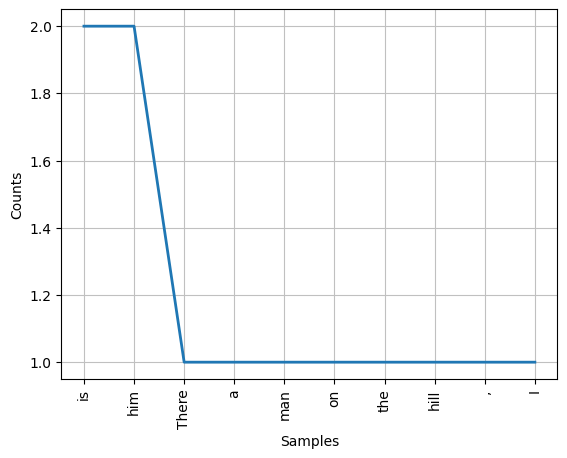

In [7]:
import nltk
from nltk import word_tokenize, FreqDist
import matplotlib.pyplot as plt
text = "There is a man on the hill,  is I watched him and him with my telescope."
fdist = FreqDist(word_tokenize(text))
fdist.plot(10)


3a) N-Gram Model Excluding Stop Words



In [13]:
import nltk
from nltk.corpus import stopwords
def n_grams(text, n=1):
    words = [w for w in text.split() if w not in stopwords.words('english')]
    return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
print(n_grams("The sun rises in the east", 2))


['The sun', 'sun rises', 'rises east']


3b) POS Tagging Using Averaged Perceptron

In [15]:
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

tokens = nltk.word_tokenize("I am learning NLP in Python")
print(nltk.pos_tag(tokens, tagset='universal'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


[('I', 'PRON'), ('am', 'VERB'), ('learning', 'VERB'), ('NLP', 'NOUN'), ('in', 'ADP'), ('Python', 'NOUN')]


[nltk_data]   Unzipping taggers\universal_tagset.zip.


Experiment 4 (a)

In [2]:
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

text = "Artificial intelligence has made significant advancements, but it still struggles to understand human emotions and context, limiting its ability to interact naturally."

def get_wordnet_pos(tag):
    return {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}.get(tag[0], wordnet.NOUN)

tokens = word_tokenize(text)
lemmatizer = WordNetLemmatizer()
pos_tags = nltk.pos_tag(tokens)
lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
print(lemmatized)

print("Lemmatized Text:", " ".join(lemmatized))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['Artificial', 'intelligence', 'have', 'make', 'significant', 'advancement', ',', 'but', 'it', 'still', 'struggle', 'to', 'understand', 'human', 'emotion', 'and', 'context', ',', 'limit', 'it', 'ability', 'to', 'interact', 'naturally', '.']
Lemmatized Text: Artificial intelligence have make significant advancement , but it still struggle to understand human emotion and context , limit it ability to interact naturally .


Experiment 4 (b)

<Axes: xlabel='Samples', ylabel='Counts'>

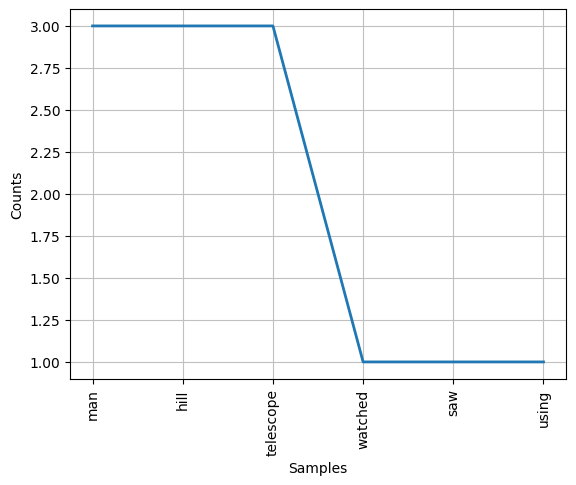

In [3]:
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

text = "There is a man on the hill, and I watched him with my telescope. There is a man on the hill, and he has a telescope. I’m on a hill, and I saw a man using my telescope."
words = [w.lower() for w in word_tokenize(text) if w.isalpha() and w.lower() not in stopwords.words('english')]
FreqDist(words).plot(10)


Experiment 5 (a)

In [4]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

sentence = "Morphological analysis is important for natural language processing."
words = word_tokenize(sentence)
stems = lambda stemmer: [stemmer.stem(w) for w in words]
lemmas = [WordNetLemmatizer().lemmatize(w) for w in words]

print("Porter:", stems(PorterStemmer()), "\nLancaster:", stems(LancasterStemmer()), "\nSnowball:", stems(SnowballStemmer('english')), "\nLemmas:", lemmas)


Porter: ['morpholog', 'analysi', 'is', 'import', 'for', 'natur', 'languag', 'process', '.'] 
Lancaster: ['morpholog', 'analys', 'is', 'import', 'for', 'nat', 'langu', 'process', '.'] 
Snowball: ['morpholog', 'analysi', 'is', 'import', 'for', 'natur', 'languag', 'process', '.'] 
Lemmas: ['Morphological', 'analysis', 'is', 'important', 'for', 'natural', 'language', 'processing', '.']


In [ ]:
pip install spacy

Experiment 5 (b)

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

for t in nlp("The quick brown fox jumps over the lazy dog."):
    print(t.text, t.dep_, t.head.text)


ModuleNotFoundError: No module named 'spacy'

Experiment 6

In [6]:
from collections import Counter
from nltk import word_tokenize, ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

docs = [
    "Technology is rapidly evolving in the modern world. Advancements in computing are transforming industries.",
    "Artificial intelligence is one of the most exciting fields. It has applications in healthcare, finance, and transportation.",
    "Natural language processing is a fascinating field. It enables machines to understand human language."
]
tokens = [WordNetLemmatizer().lemmatize(w.lower()) for d in docs for w in word_tokenize(d) if w.isalpha() and w not in stopwords.words('english')]
print(Counter(ngrams(tokens, 2)).most_common(5))


[(('field', 'it'), 2), (('technology', 'rapidly'), 1), (('rapidly', 'evolving'), 1), (('evolving', 'modern'), 1), (('modern', 'world'), 1)]


Experiment 7

In [7]:
from collections import defaultdict
from nltk import word_tokenize, bigrams, FreqDist

def bigram_model(corpus):
    tokens = ["<s>"] + word_tokenize(corpus.lower()) + ["</s>"]
    u_freq, b_freq, v_size = FreqDist(tokens), FreqDist(bigrams(tokens)), len(set(tokens))
    return {(w1, w2): (b_freq[(w1, w2)] + 1) / (u_freq[w1] + v_size) for w1, w2 in b_freq}

corpus = "I love machine learning. Machine learning is amazing. I love AI."
print(bigram_model(corpus))


{('i', 'love'): 0.25, ('machine', 'learning'): 0.25, ('<s>', 'i'): 0.18181818181818182, ('love', 'machine'): 0.16666666666666666, ('learning', '.'): 0.16666666666666666, ('.', 'machine'): 0.15384615384615385, ('learning', 'is'): 0.16666666666666666, ('is', 'amazing'): 0.18181818181818182, ('amazing', '.'): 0.18181818181818182, ('.', 'i'): 0.15384615384615385, ('love', 'ai'): 0.16666666666666666, ('ai', '.'): 0.18181818181818182, ('.', '</s>'): 0.15384615384615385}
